We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.
* ` `

**in data every column is not suitable or usefull for us**
Our aim is to identify;

* Dominant Major_category for Men and Women 
* Top Majors in Dominant category according to the highest Employment(means   after graduate immediately get job)
* Top Majors in Dominant category according to highest Median Salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("jobs.csv")
data.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
data.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
data.index

RangeIndex(start=0, stop=173, step=1)

In [6]:
data.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
data.describe(include="all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MULTI-DISCIPLINARY OR GENERAL SCIENCE,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [8]:
data.isnull()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

**latidute means horizontal and longtiude means vertical**

In [10]:
import seaborn as sns
#this is advance liabary based on matplotlib , this is visualization laibary

<AxesSubplot:>

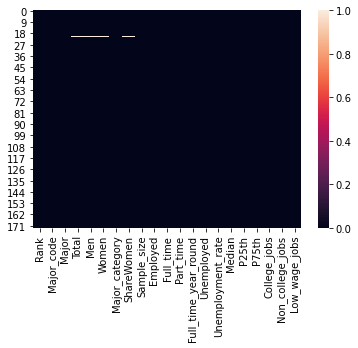

In [11]:
sns.heatmap(data.isnull())
#this helps us to see the line in which data is missing,only one row is exit in which data exit

<AxesSubplot:>

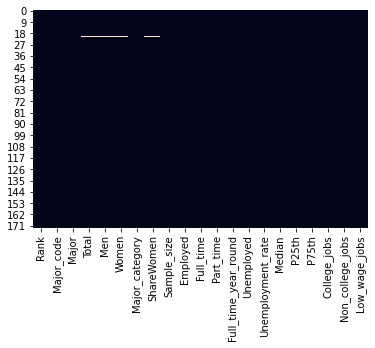

In [12]:
sns.heatmap(data.isnull(),cbar=False)
#will remove the color bar

In [13]:
data.isnull()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data["Men"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Men, Length: 173, dtype: bool

In [15]:
data[data["Men"].isnull()]
#we found the row which is empty

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [16]:
data.iloc[21]

Rank                                                 22
Major_code                                         1104
Major                                      FOOD SCIENCE
Total                                               NaN
Men                                                 NaN
Women                                               NaN
Major_category          Agriculture & Natural Resources
ShareWomen                                          NaN
Sample_size                                          36
Employed                                           3149
Full_time                                          2558
Part_time                                          1121
Full_time_year_round                               1735
Unemployed                                          338
Unemployment_rate                             0.0969315
Median                                            53000
P25th                                             32000
P75th                                           

In [17]:
data.dropna(axis="index",inplace=True)
#data.dropna(axis=0,inplace=True) row wise
#this will remove the row which have nan value

**now data is clean and now find dominent major categoy of men and women**

In [21]:
data.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [22]:
data.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [23]:
data["Major_category"].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [24]:
len(data["Major_category"].unique())

16

In [25]:
dominent=data.groupby("Major_category")[["Men","Women"]].mean()
dominent

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000
Computers & Mathematics,18975.000000,8207.545455
Education,6470.375000,28475.187500
Engineering,14079.551724,4457.793103
Health,6293.083333,32309.416667


<AxesSubplot:xlabel='Major_category'>

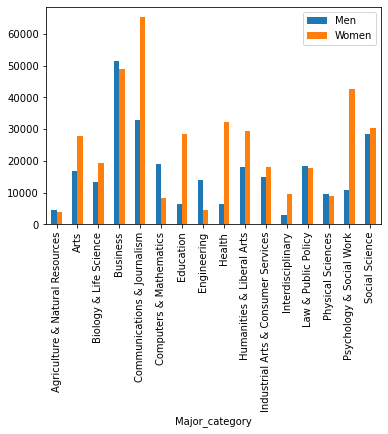

In [26]:
dominent.plot.bar()

<AxesSubplot:ylabel='Major_category'>

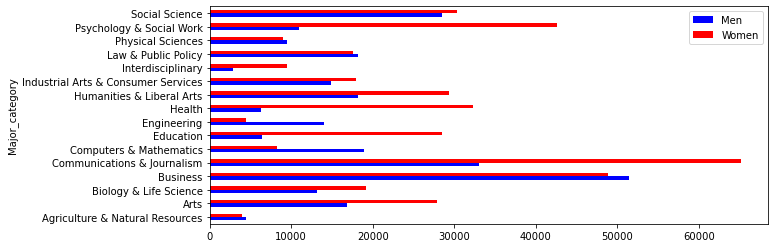

In [27]:
dominent.plot.barh(figsize=(10,4),color={"Men":"b","Women":"r"})

**now we want to add a column that compair men or women is dominent**

In [28]:
dominent.iloc[0]

Men      4484.111111
Women    3918.111111
Name: Agriculture & Natural Resources, dtype: float64

In [29]:
dominent.iloc[0]["Men"]

4484.111111111111

In [30]:
def domi(row):
    men=row["Men"]
    women=row["Women"]
    if men>women:
        return "men"
    else:
        return "women"

In [32]:
dominent.apply(domi,axis=1)

Major_category
Agriculture & Natural Resources          men
Arts                                   women
Biology & Life Science                 women
Business                                 men
Communications & Journalism            women
Computers & Mathematics                  men
Education                              women
Engineering                              men
Health                                 women
Humanities & Liberal Arts              women
Industrial Arts & Consumer Services    women
Interdisciplinary                      women
Law & Public Policy                      men
Physical Sciences                        men
Psychology & Social Work               women
Social Science                         women
dtype: object

In [33]:
dominent["Dominent Gender"]=dominent.apply(domi,axis=1)

In [34]:
dominent

,Men,Women,Dominent Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,men
Arts,16798.750000,27842.500000,women
Biology & Life Science,13208.500000,19210.214286,women
Business,51373.230769,48809.538462,men
Communications & Journalism,32980.250000,65170.000000,women
Computers & Mathematics,18975.000000,8207.545455,men
Education,6470.375000,28475.187500,women
Engineering,14079.551724,4457.793103,men
Health,6293.083333,32309.416667,women


In [35]:
gen_grp=dominent.groupby("Dominent Gender")
gen_grp

**aggregation mean group the data and find a single value for each data**

In [36]:
gen_grp.groups

{'men': ['Agriculture & Natural Resources', 'Business', 'Computers & Mathematics', 'Engineering', 'Law & Public Policy', 'Physical Sciences'], 'women': ['Arts', 'Biology & Life Science', 'Communications & Journalism', 'Education', 'Health', 'Humanities & Liberal Arts', 'Industrial Arts & Consumer Services', 'Interdisciplinary', 'Psychology & Social Work', 'Social Science']}

In [37]:
len(gen_grp.groups)

2

In [38]:
df_men=gen_grp.get_group("men")
df_men

,Men,Women,Dominent Gender
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,men
Business,51373.230769,48809.538462,men
Computers & Mathematics,18975.000000,8207.545455,men
Engineering,14079.551724,4457.793103,men
Law & Public Policy,18225.800000,17595.600000,men
Physical Sciences,9539.000000,9008.900000,men


In [39]:
len(df_men)

6

In [40]:
df_women=gen_grp.get_group("women")
df_women

,Men,Women,Dominent Gender
Major_category,,,
Arts,16798.750000,27842.500000,women
Biology & Life Science,13208.500000,19210.214286,women
Communications & Journalism,32980.250000,65170.000000,women
Education,6470.375000,28475.187500,women
Health,6293.083333,32309.416667,women
Humanities & Liberal Arts,18189.733333,29374.800000,women
Industrial Arts & Consumer Services,14825.857143,18001.571429,women
Interdisciplinary,2817.000000,9479.000000,women
Psychology & Social Work,10901.666667,42543.555556,women


In [42]:
len(gen_grp.get_group("women"))

10

In [43]:
df_men.index
#man category

Index(['Agriculture & Natural Resources', 'Business',
       'Computers & Mathematics', 'Engineering', 'Law & Public Policy',
       'Physical Sciences'],
      dtype='object', name='Major_category')

In [44]:
man_cat=list(df_men.index)
man_cat
#these are the men dominent category

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

In [45]:
df_women.index
#women category

Index(['Arts', 'Biology & Life Science', 'Communications & Journalism',
       'Education', 'Health', 'Humanities & Liberal Arts',
       'Industrial Arts & Consumer Services', 'Interdisciplinary',
       'Psychology & Social Work', 'Social Science'],
      dtype='object', name='Major_category')

In [46]:
woman_cat=list(df_women.index)
woman_cat
#these are the women dominent category

['Arts',
 'Biology & Life Science',
 'Communications & Journalism',
 'Education',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Psychology & Social Work',
 'Social Science']

**find the Top Majors in Dominant category according to the highest Employment(means after graduate immediately get job)**

In [49]:
data.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [48]:
data.shape

(172, 21)

In [51]:
data["Major_category"]
#we use isin member function that seprate the men and women catergoy

0                   Engineering
1                   Engineering
2                   Engineering
3                   Engineering
4                   Engineering
                 ...           
168      Biology & Life Science
169    Psychology & Social Work
170    Psychology & Social Work
171    Psychology & Social Work
172                   Education
Name: Major_category, Length: 172, dtype: object

In [56]:
men_bol=data["Major_category"].isin(man_cat)
men_bol

0       True
1       True
2       True
3       True
4       True
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Major_category, Length: 172, dtype: bool

In [57]:
women_bol=data["Major_category"].isin(woman_cat)
women_bol

0      False
1      False
2      False
3      False
4      False
       ...  
168     True
169     True
170     True
171     True
172     True
Name: Major_category, Length: 172, dtype: bool

In [59]:
men_majors=data[men_bol]
men_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
127,128,6211,HOSPITALITY MANAGEMENT,43647.0,15204.0,28443.0,Business,0.651660,546,36728,...,7494,23106,2393,0.061169,33000,25000,42000,2325,23341,9063
143,144,1105,PLANT SCIENCE AND AGRONOMY,7416.0,4897.0,2519.0,Agriculture & Natural Resources,0.339671,110,6594,...,1246,4522,314,0.045455,32000,22900,40000,2089,3545,1231
152,153,1103,ANIMAL SCIENCES,21573.0,5347.0,16226.0,Agriculture & Natural Resources,0.752144,255,17112,...,5353,10824,917,0.050862,30000,22000,40000,5443,9571,2125


In [60]:
women_majors=data[women_bol]
women_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,2665,9005,505,0.036983,45000,36000,50000,5546,7176,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


# coress verification

In [67]:
men_majors.shape

(77, 21)

In [68]:
women_majors.shape

(95, 21)

In [87]:
m_sort=men_majors["Major_category"].unique()
m_sort=sorted(m_sort)
m_sort

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

In [88]:
w_sort=women_majors["Major_category"].unique()
w_sort=sorted(w_sort)
w_sort

['Arts',
 'Biology & Life Science',
 'Communications & Journalism',
 'Education',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Psychology & Social Work',
 'Social Science']

In [98]:
pd.Series(m_sort).equals(pd.Series(man_cat))
#check overall equality

True

In [99]:
pd.Series(w_sort).equals(pd.Series(woman_cat))
#check overall equality

True

In [100]:
w_sort==woman_cat
#check overall equality another way

True

In [101]:
pd.Series(woman_cat)==w_sort
#check overall equality

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

# men_majors with respect to employment

using men_majors we find the Top Majors in Dominant category according to the highest Employment(means after graduate immediately get job)

In [125]:
men_majors_emp=men_majors.sort_values(["Employed"],ascending=False)
men_majors_emp
#means busniness is in top number of empolyed 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.322222,5,604,...,126,396,49,0.075038,50000,42800,57000,501,50,49


In [126]:
#now find all top majors 
emp=men_majors_emp.groupby("Major_category")[["Major","Employed","Median"]].first()
emp

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,ANIMAL SCIENCES,17112,30000
Business,BUSINESS MANAGEMENT AND ADMINISTRATION,276234,38000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,MECHANICAL ENGINEERING,76442,60000
Law & Public Policy,CRIMINAL JUSTICE AND FIRE PROTECTION,125393,35000
Physical Sciences,CHEMISTRY,48535,39000


# men_majors with respect to salary

In [127]:
men_majors_salary=men_majors.sort_values("Median",ascending=False) 
salry=men_majors_salary.groupby("Major_category")[["Major","Employed","Median"]].first()
salry

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,8884,40000
Business,ACTUARIAL SCIENCE,2912,62000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,PETROLEUM ENGINEERING,1976,110000
Law & Public Policy,COURT REPORTING,930,54000
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1526,62000


# normalized data

In [130]:
cols=["Employed","Median"]
normalized=salry.copy()
for c in cols:
    normalized[c]=normalized[c]*100/normalized[c].sum()

In [131]:
normalized

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,7.508769,10.498688
Business,ACTUARIAL SCIENCE,2.461226,16.272966
Computers & Mathematics,COMPUTER SCIENCE,86.284072,13.910761
Engineering,PETROLEUM ENGINEERING,1.670118,28.871391
Law & Public Policy,COURT REPORTING,0.786037,14.173228
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


# set index

In [132]:
normalized.set_index("Major")

,Employed,Median
Major,,
GENERAL AGRICULTURE,7.508769,10.498688
ACTUARIAL SCIENCE,2.461226,16.272966
COMPUTER SCIENCE,86.284072,13.910761
PETROLEUM ENGINEERING,1.670118,28.871391
COURT REPORTING,0.786037,14.173228
ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


<AxesSubplot:ylabel='Major'>

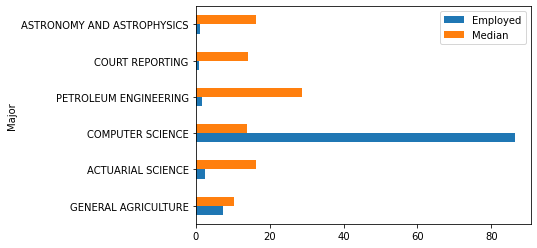

In [136]:
normalized.set_index("Major").plot.barh()